# Model Regresi Sederhana (Pengaruh suhu udara terhadap total peminjaman sepeda)

**1. Load Data**

In [1]:
# Menghubungkan Collab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Memanggil data set lewat Google Drive
path = "/content/drive/MyDrive/Project_Machine_Learning/Praktikum_Mandiri_3/"

In [11]:
# Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + "Data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
# Menghitung statistik deskriptif pada kolom numeric dengan describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**2. Seleksi Fitur**

In [30]:
# Memilih kolom yang ingin digunakan
df_selected = df[['temp', 'cnt']]

In [32]:
# Menampilkan 5 data teratas hasil seleksi
print("=== Data Setelah Memilih Kolom ===")
print(df_selected.head())

=== Data Setelah Memilih Kolom ===
       temp   cnt
0  0.344167   985
1  0.363478   801
2  0.196364  1349
3  0.200000  1562
4  0.226957  1600


In [33]:
# Statistik deskriptif kolom terpilih
print("\n=== Statistik Deskriptif Kolom Terpilih ===")
print(df_selected.describe())


=== Statistik Deskriptif Kolom Terpilih ===
             temp          cnt
count  731.000000   731.000000
mean     0.495385  4504.348837
std      0.183051  1937.211452
min      0.059130    22.000000
25%      0.337083  3152.000000
50%      0.498333  4548.000000
75%      0.655417  5956.000000
max      0.861667  8714.000000


**3. Pembagian Data**

In [37]:
from sklearn.model_selection import train_test_split

# Variabel independent/bebas/fitur : tinggi badan
X = df[["temp"]]

# Variabel dependent/terikat/target : berat badan
y = df["cnt"]

# Split data: 80% training, 20% testing
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data training:", len(X_training))
print("Jumlah data testing :", len(X_testing))

Jumlah data training: 584
Jumlah data testing : 147


**4. Pemodelan**

In [38]:
from sklearn.linear_model import LinearRegression

# Buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

# Jalankan training
model.fit(X_training, y_training)

LinearRegression()

**5. Evaluasi Model**

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_testing)
r2 = r2_score(y_testing, y_pred)

print("\n=== Evaluasi Model ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


=== Evaluasi Model ===
Mean Squared Error (MSE): 691035.01
R-squared (R²): 0.4037


In [47]:
# Persamaan regresi
intercept = model.intercept_
coef = model.coef_[0]
print("\n=== Persamaan Regresi Linear Sederhana ===")
print(f"cnt = {intercept:.2f} + ({coef:.2f}) * temp")


=== Persamaan Regresi Linear Sederhana ===
cnt = 1272.16 + (6575.39) * temp


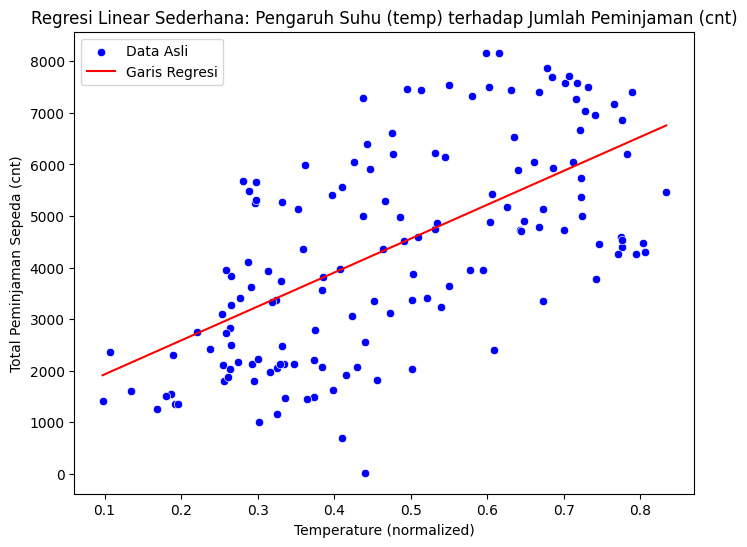

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot regresi
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_testing['temp'], y=y_testing, color='blue', label='Data Asli')
sns.lineplot(x=X_testing['temp'], y=y_pred, color='red', label='Garis Regresi')
plt.title('Regresi Linear Sederhana: Pengaruh Suhu (temp) terhadap Jumlah Peminjaman (cnt)')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Peminjaman Sepeda (cnt)')
plt.legend()
plt.show()

In [55]:
# Buat tabel hasil
hasil = pd.DataFrame({
    "Suhu (temp)": X_testing["temp"].to_numpy(),
    "Jumlah Aktual (cnt)": y_testing.to_numpy(),
    "Jumlah Prediksi (cnt)": y_pred,
})

#1) Selisih error (positif = overpredict)
hasil["Selisih error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

#2) Akurasi per-baris (100 * (1 - |error| / aktual)), dibatasi 0-100
denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

display(hasil.head())

,Suhu (temp),Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih error (cnt),Akurasi (%)
0,0.475833,6606,4400.946437,-2205.053563,66.620443
1,0.186957,1550,2501.473134,951.473134,38.614637
2,0.330833,3747,3447.514414,-299.485586,92.007324
3,0.425833,6041,4072.176774,-1968.823226,67.408985
4,0.550000,7538,4888.623628,-2649.376372,64.853060
